In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
#from pandas.tools.plotting import scatter_matrix
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
sns.set()
import math

warnings.filterwarnings('ignore')
%matplotlib inline


https://www.kaggle.com/arielyaakobi10/accident-severity-classification-shirley-ariel
https://www.kaggle.com/tsiaras/uk-road-safety-accidents-and-vehicles/notebooks
https://www.researchgate.net/publication/332408305_Accident_Severity_Prediction_Using_Data_Mining_Methods

In [3]:
acc = pd.read_csv('Accident_Information.csv', encoding = 'latin')
veh = pd.read_csv('Vehicle_Information.csv', encoding = 'latin')

# Merging two data sets into one with inner join by index
df = pd.merge(veh, acc, how = 'inner', on = 'Accident_Index')

#Check data sample
print(df.shape)
df.head()

(2058408, 57)


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No


In [4]:
df.dtypes

Accident_Index                                  object
Age_Band_of_Driver                              object
Age_of_Vehicle                                 float64
Driver_Home_Area_Type                           object
Driver_IMD_Decile                              float64
Engine_Capacity_.CC.                           float64
Hit_Object_in_Carriageway                       object
Hit_Object_off_Carriageway                      object
Journey_Purpose_of_Driver                       object
Junction_Location                               object
make                                            object
model                                           object
Propulsion_Code                                 object
Sex_of_Driver                                   object
Skidding_and_Overturning                        object
Towing_and_Articulation                         object
Vehicle_Leaving_Carriageway                     object
Vehicle_Location.Restricted_Lane               float64
Vehicle_Ma

In [5]:
#Checking for missing values
null_count = df.isnull().sum()
null_count[null_count>0]

Age_of_Vehicle                                 337962
Driver_IMD_Decile                              689290
Engine_Capacity_.CC.                           250317
make                                           110845
model                                          299357
Propulsion_Code                                233598
Vehicle_Location.Restricted_Lane                 1124
1st_Road_Number                                     1
2nd_Road_Class                                 827937
2nd_Road_Number                                 18927
Did_Police_Officer_Attend_Scene_of_Accident       114
Latitude                                          124
Location_Easting_OSGR                             124
Location_Northing_OSGR                            124
Longitude                                         125
LSOA_of_Accident_Location                      139207
Pedestrian_Crossing-Human_Control                 654
Pedestrian_Crossing-Physical_Facilities          1370
Speed_limit                 

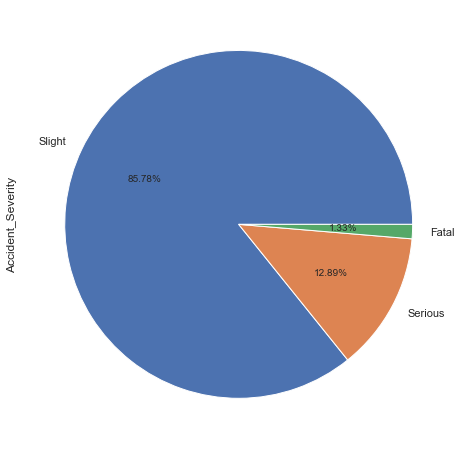

In [6]:
# ax = sns.countplot(x = df.Accident_Severity ,palette="Set2")
# plt.title('Distribution of 2 Million Targets',)
# plt.xlabel('Accident Severity')
# plt.ylabel('Frequency [%]')
# plt.show()
#(df['Accident_Severity'].value_counts()/len(df['Accident_Severity'])).plot(kind="pie", figsize=(8, 8),autopct='%1.2f%%')
(df['Accident_Severity'].value_counts()/len(df['Accident_Severity'])).plot(kind="pie", figsize=(8, 8),autopct='%1.2f%%')
# colors = ['green', 'Orange', 'Red']
# patches, texts = plt.pie(df['Accident_Severity'], colors=colors, shadow=True, startangle=90)
# plt.legend(patches, labels, loc="best")
# plt.axis('equal')
# plt.tight_layout()
# plt.show()

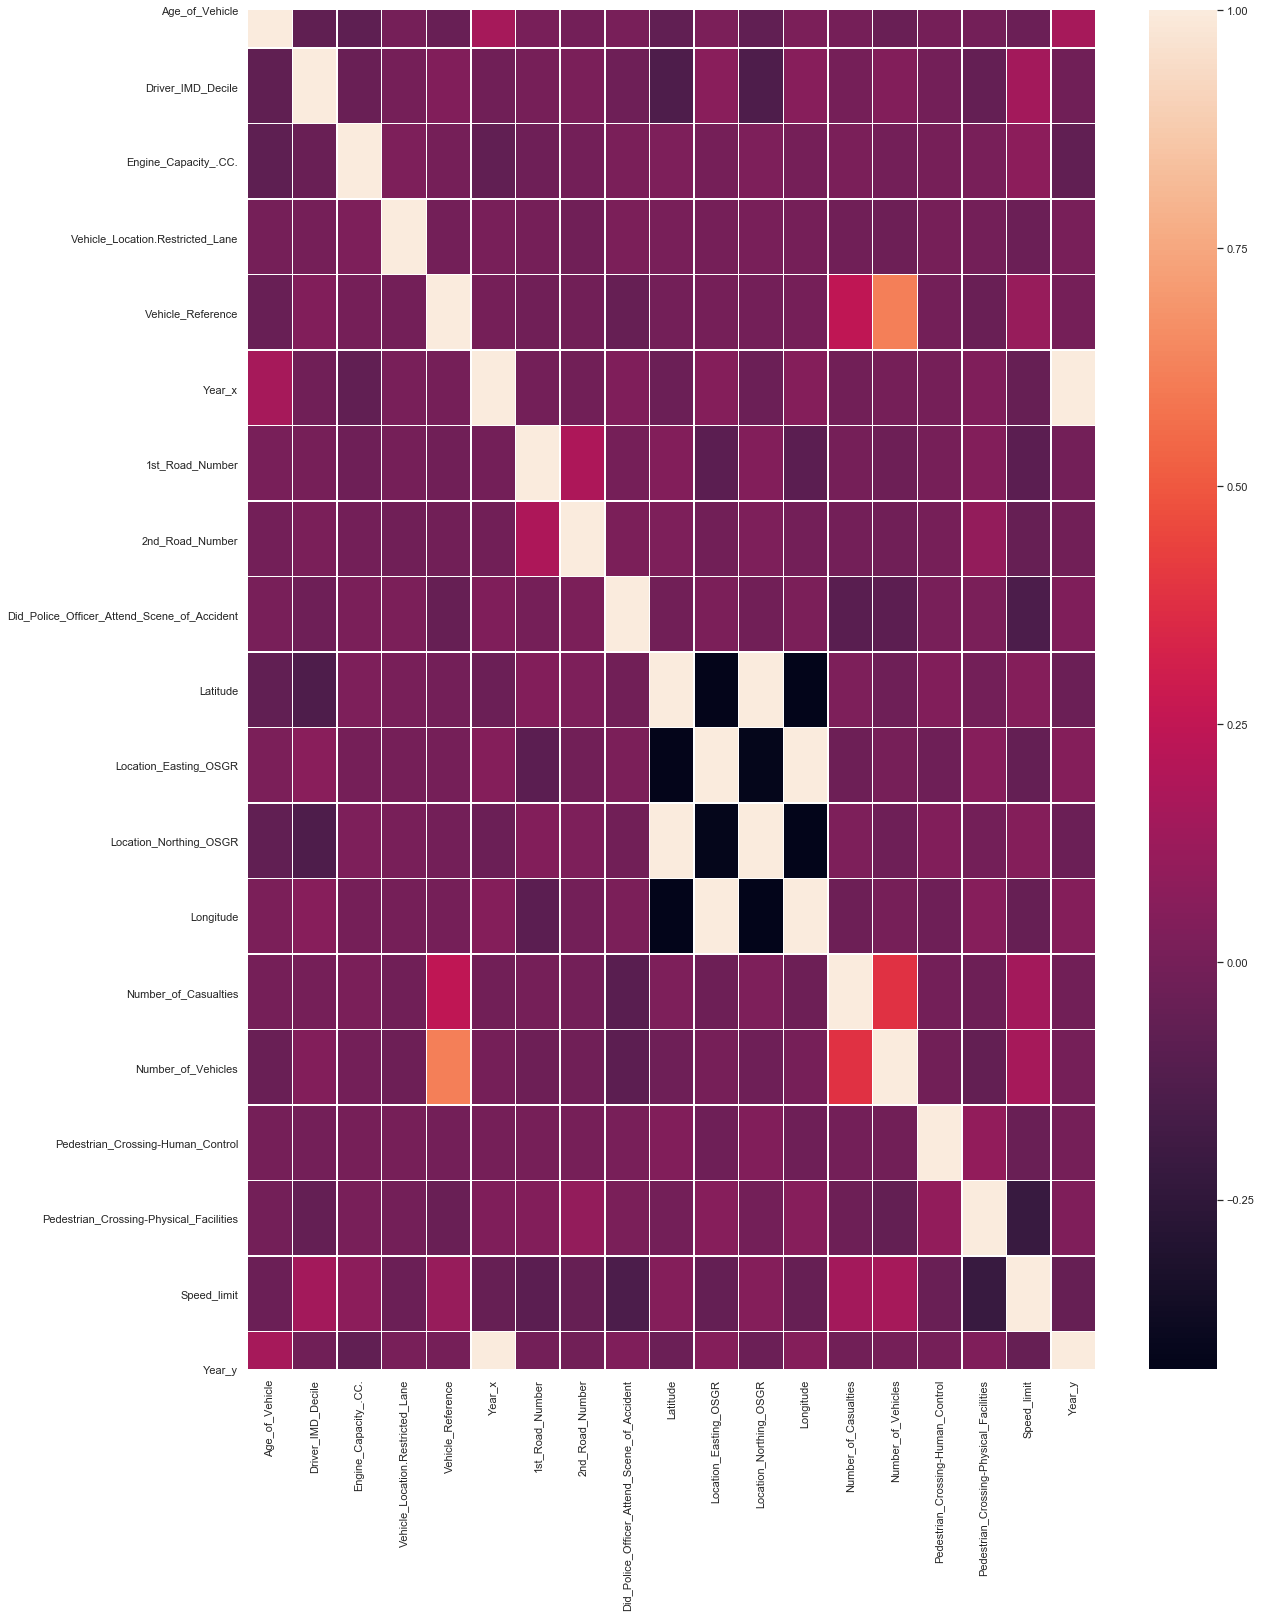

In [7]:
plt.figure(figsize=(19,25))
sns.heatmap(df.corr(),linewidths=.5)
plt.show()

Min: 1 
Max: 93 
Median: 1.0


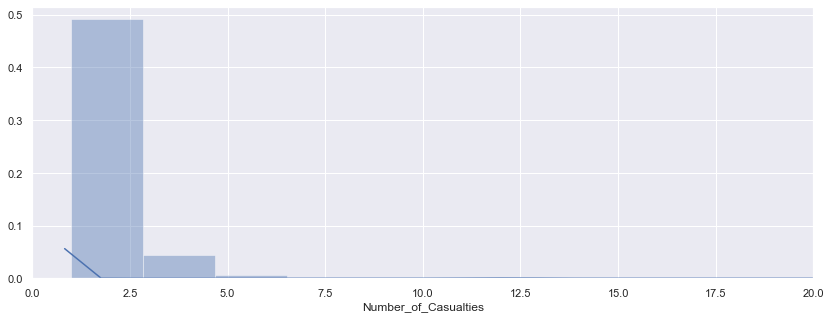

In [8]:
plt.figure(figsize=(14,5))
sns.distplot(df.Number_of_Casualties).set_xlim(0,20)
print('Min:',    df.Number_of_Casualties.min(), '\n'
      'Max:',    df.Number_of_Casualties.max(), '\n'
      'Median:', df.Number_of_Casualties.median())

In [9]:
df['Accident_Severity'] = df['Accident_Severity'].replace(['Serious', 'Fatal'], 'Serious or Fatal')
df = pd.get_dummies(df, columns=['Accident_Severity'])
df = df.drop('Accident_Severity_Serious or Fatal', axis=1)
df.Accident_Severity_Slight.value_counts(normalize=True)

1    0.857775
0    0.142225
Name: Accident_Severity_Slight, dtype: float64

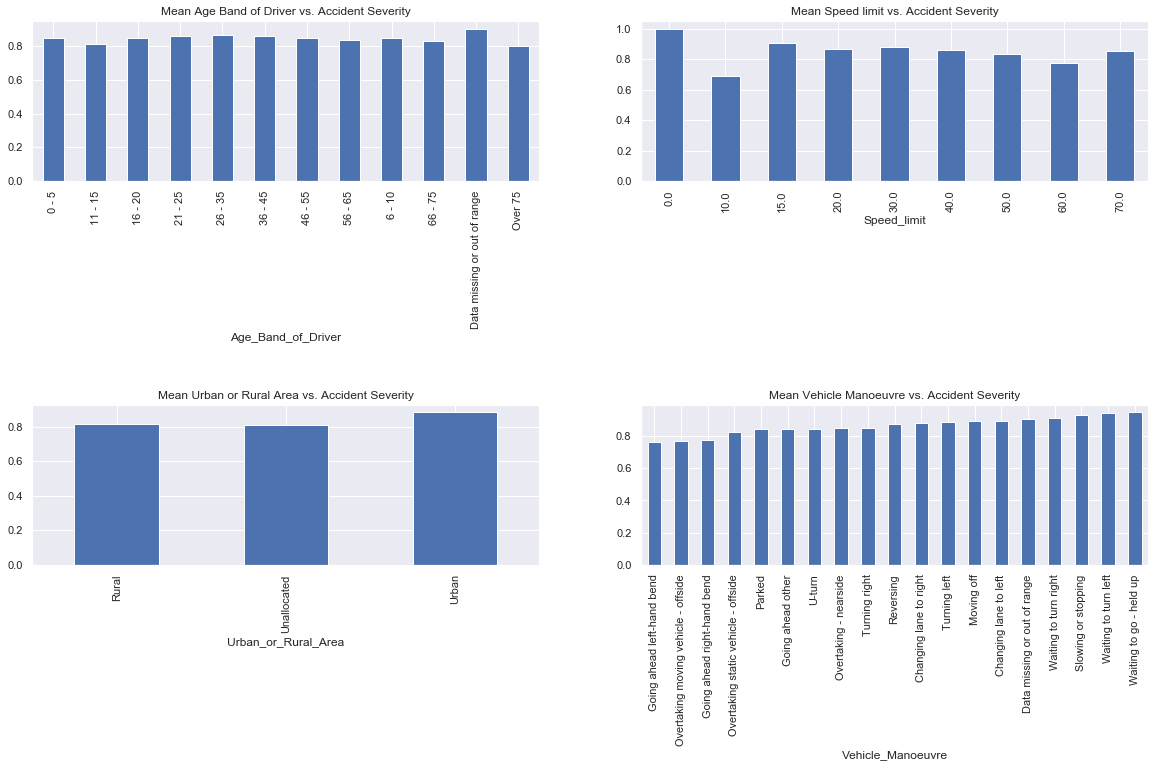

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
plt.subplots_adjust(hspace=1.4)

(df.groupby(['Age_Band_of_Driver'])
 .mean()
 ['Accident_Severity_Slight']
 .sort_index()
 .plot
 .bar(title = "Mean Age Band of Driver vs. Accident Severity",
      ax = axes[0,0]))

(df.groupby(['Speed_limit'])
 .mean()
 ['Accident_Severity_Slight']
 .sort_index()
 .plot
 .bar(title = "Mean Speed limit vs. Accident Severity",
      ax = axes[0,1]))

(df.groupby(['Urban_or_Rural_Area'])
 .mean()
 ['Accident_Severity_Slight']
 .sort_index()
 .plot
 .bar(title = "Mean Urban or Rural Area vs. Accident Severity",
      ax = axes[1,0]))

(df.groupby(['Vehicle_Manoeuvre'])
 .mean()
 ['Accident_Severity_Slight']
 .sort_values()
 .plot
 .bar(title = "Mean Vehicle Manoeuvre vs. Accident Severity",
      ax = axes[1,1]))

plt.show()


In [11]:
X = df.drop(['Accident_Index','Accident_Severity_Slight'], axis=1)
y = df.Accident_Severity_Slight
print(X.shape,
      y.shape)

(2058408, 55) (2058408,)


In [12]:
def get_Speed_limit(df):
    return df[['Speed_limit']]

FullTransformerOnSpeedLimit = Pipeline([("Select_Speed_Limit", FunctionTransformer(func=get_Speed_limit, validate=False)),
                                        ("Fill_Null",          SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ("One_Hot_Encoder",    OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                       ])


def get_Time(df):
    return pd.to_datetime(df['Time'], format='%H:%M').dt.time

def find_time_group(time_object):
    if time_object<pd.datetime.time(pd.datetime(2000,1,1,5,0)):
        return 'Night'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,7,0)):
        return 'Early Morning'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,10,0)):
        return 'Morning'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,15,0)):
        return 'Midday'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,18,0)):
        return 'Afternoon'
    elif time_object<pd.datetime.time(pd.datetime(2000,1,1,20,0)):
        return 'Evening'
    elif time_object<=pd.datetime.time(pd.datetime(2000,1,1,23,59)):
        return 'Late Evening'
    return np.nan

FullTransformerOnTime = Pipeline([("Select_Time",     FunctionTransformer(func=get_Time, validate=False)),
                                  ("Group_Time",      FunctionTransformer(func=lambda x: x.apply(find_time_group).to_frame(), validate=False)),
                                  ("Fill_Null",       SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                  ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                 ])
def get_Age_of_Vehicle(df):
    return df[['Age_of_Vehicle']]

FullTransformerOnAgeofVehicle = Pipeline([("Select_Age_of_Vehicle", FunctionTransformer(func=get_Age_of_Vehicle, validate=False)),
                                          ("Fill_Null",             SimpleImputer(missing_values=np.nan, strategy='median'))
                                         ])

def get_make(df):
    list_of_small_makers = list(df['make'].value_counts()[df['make'].value_counts() < 2000].index)
    return df['make'].replace(list_of_small_makers, 'Other').to_frame()

FullTransformerOnMake = Pipeline([("Select_Make",      FunctionTransformer(func=get_make, validate=False)),
                                   ("Fill_Null",       SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Other')),
                                   ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))])
def get_Engine_Capacity(df):
    return df[['Engine_Capacity_.CC.']]

FullTransformerOnEngineCapacity = Pipeline([("Select_Engine_Capacity",       FunctionTransformer(func=get_Engine_Capacity, validate=False)),
                                            ("Fill_Null",                    SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                            ("Car_Types_by_Engine_Capacity", KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')),
                                            ("One_Hot_Encoder",              OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                           ])
def get_Engine_Capacity(df):
    return df[['Engine_Capacity_.CC.']]

FullTransformerOnEngineCapacity = Pipeline([("Select_Engine_Capacity",       FunctionTransformer(func=get_Engine_Capacity, validate=False)),
                                            ("Fill_Null",                    SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                            ("Car_Types_by_Engine_Capacity", KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')),
                                            ("One_Hot_Encoder",              OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                           ])

In [13]:
def get_columns_to_one_hot(df):
    return df[['1st_Road_Class', 'Day_of_Week', 'Junction_Detail', 'Light_Conditions', 'Number_of_Casualties', 
               'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 
               'Urban_or_Rural_Area', 'Weather_Conditions', 'Age_Band_of_Driver', 'Hit_Object_in_Carriageway',
               'Hit_Object_off_Carriageway', 'Sex_of_Driver', 'Skidding_and_Overturning',
               'Vehicle_Manoeuvre', 'Vehicle_Type'
              ]]

DataToOneHotTransformerOnColumns = Pipeline([("Select_Columns",  FunctionTransformer(func=get_columns_to_one_hot, validate=False)),
                                             ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))])

In [14]:
FeatureUnionTransformer = FeatureUnion([
                                        ("FTAgeofVehicle",   FullTransformerOnAgeofVehicle),
                                        ("FTEngineCapacity", FullTransformerOnEngineCapacity),
                                        ("FTMake",           FullTransformerOnMake),
                                        ("FTSpeedLimit",     FullTransformerOnSpeedLimit),
                                        ("FTTime",           FullTransformerOnTime),
                                        ("OHEColumns",       DataToOneHotTransformerOnColumns)])

In [15]:
Full_Transformer = Pipeline([
                           ("Feature_Engineering", FeatureUnionTransformer),
                           ("Min_Max_Transformer", MaxAbsScaler())
                           ])

In [ ]:
X_train, X_test, y_train, y_test = split(X, y)

In [ ]:
%%time

clf = LogisticRegression(class_weight = "balanced")

Full_Transformer.fit(X_train)
X_train_transformed = Full_Transformer.transform(X_train)
clf.fit(X_train_transformed, y_train)

X_test_transformed = Full_Transformer.transform(X_test)

y_pred = clf.predict(X_test_transformed)
 
print('Classification Report:',classification_report(y_test, y_pred))

print('Score:',roc_auc_score(y_test.values, clf.predict_proba(X_test_transformed)[:, 1]))